In [81]:
import pandas as pd
import itertools
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
%matplotlib inline
pd.options.display.max_rows = 999

In [3]:
cereals = pd.read_csv("cereals.csv")
cereals = cereals.replace({-1: float('nan')})

In [4]:
for nutrition in ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']:
    cereals[nutrition] = cereals[nutrition]/cereals.cups
    
for nutrients in ['sodium', 'potass']:
    cereals[nutrients] = cereals[nutrients]/1000

In [5]:
cereals = cereals.interpolate(method='pchip')

In [6]:
def truncate(floats):
    return float("{0:.2f}".format(floats))

for nutrition in ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']:
    cereals[nutrition] = cereals[nutrition].map(truncate)

In [7]:
cereals.index = cereals.pop("name")

In [9]:
cluster = cereals[['protein', 'sugars', 'fiber', 'sodium']]

In [10]:
pca = PCA(n_components=2)
pca.fit(cluster)
reduced_cluster = pca.transform(cluster)

In [11]:
kmeans = KMeans(4)

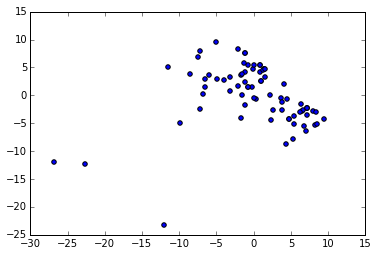

In [89]:
plt.scatter(reduced_cluster[:, 0], reduced_cluster[:, 1])
plt.show()

In [13]:
cluster_pred = kmeans.fit_predict(reduced_cluster)

<function matplotlib.pyplot.show>

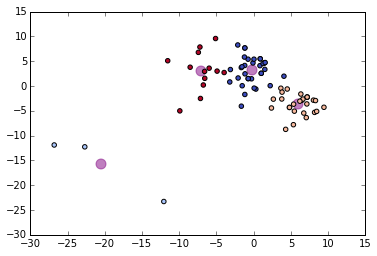

In [99]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], alpha=.5, s=100, color="purple")
plt.scatter(reduced_cluster[:, 0], reduced_cluster[:, 1], c=cluster_pred, cmap="coolwarm")
plt.show

In [15]:
cluster['Kgroup'] = cluster_pred
cluster = cluster.sort("Kgroup")

/Users/MatthewBarnette/iron_yard_hw/honey-nut-clusters/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/MatthewBarnette/iron_yard_hw/honey-nut-clusters/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [17]:
cluster.Kgroup = cluster.Kgroup.map({3: 'sweet balance', 2: "balanced", 1: "fiber", 0: "chocolate covered sugar bombs"})

In [60]:
cluster = cluster.sort("Kgroup")
cluster

/Users/MatthewBarnette/iron_yard_hw/honey-nut-clusters/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,protein,sugars,fiber,sodium,Kgroup
name,,,,,
Double_Chex,2.67,6.67,1.33,0.25,balanced
Cream_of_Wheat_(Quick),3.00,0.00,1.00,0.08,balanced
Crispix,2.00,3.00,1.00,0.22,balanced
Puffed_Wheat,2.00,0.00,1.00,0.00,balanced
Cheerios,4.80,0.80,1.60,0.23,balanced
Rice_Chex,0.88,1.77,0.00,0.21,balanced
Rice_Krispies,2.00,3.00,0.00,0.29,balanced
Shredded_Wheat,2.00,0.00,3.00,0.00,balanced
Shredded_Wheat_'n'Bran,4.48,0.00,5.97,0.00,balanced


In [23]:
balanced = cluster[cluster["Kgroup"] == "balanced"]
sweet_balance = cluster[cluster["Kgroup"] == "sweet balance"]
fiber = cluster[cluster["Kgroup"] == "fiber"]
chocolate_covered_sugar_bombs = cluster[cluster["Kgroup"] == "chocolate covered sugar bombs"]

mean_fiber = pd.DataFrame(fiber.mean())
mean_sweet_balance = pd.DataFrame(sweet_balance.mean())
mean_balanced = pd.DataFrame(balanced.mean())
mean_chocolate_covered_sugar_bombs = pd.DataFrame(chocolate_covered_sugar_bombs.mean())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e5b85f8>], dtype=object)

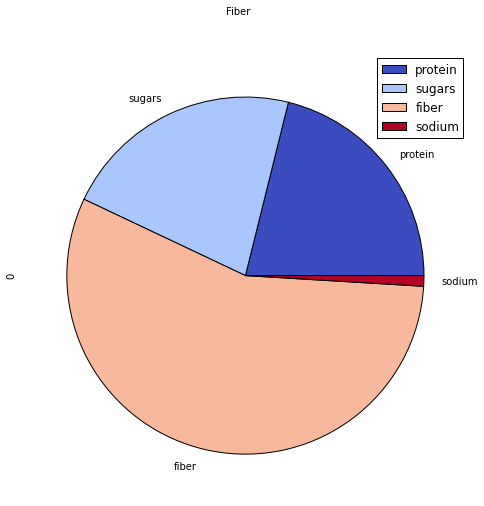

In [105]:
mean_fiber.plot(kind="pie", subplots=True, figsize=(8, 8), title="Fiber", colormap="coolwarm")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e88a518>], dtype=object)

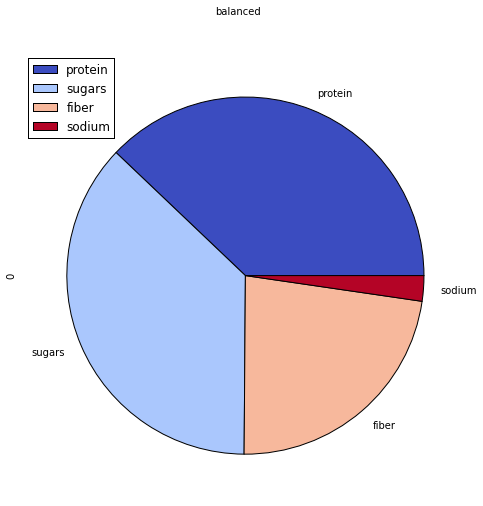

In [106]:
mean_balanced.plot(kind="pie", subplots=True, figsize=(8, 8), title='balanced', colormap="coolwarm")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e783da0>], dtype=object)

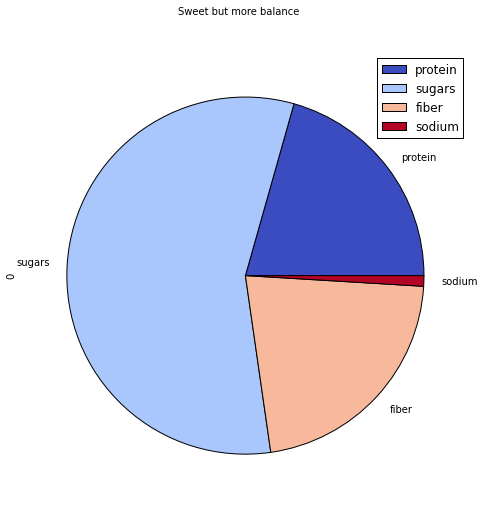

In [107]:
mean_sweet_balance.plot(kind="pie", subplots=True, figsize=(8, 8),title='Sweet but more balance', colormap="coolwarm")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ec1f7f0>], dtype=object)

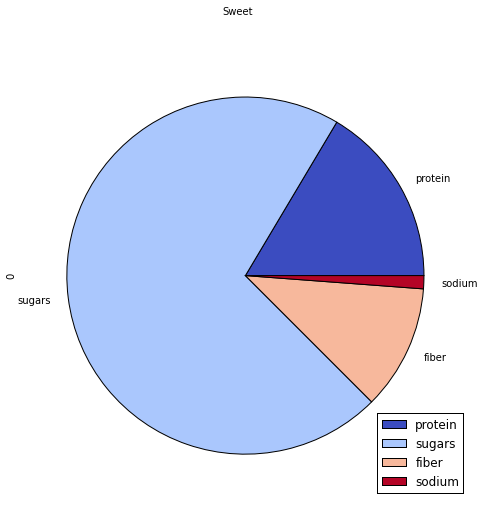

In [108]:
mean_chocolate_covered_sugar_bombs.plot(kind="pie", subplots=True, figsize=(8, 8), title="Sweet", colormap="coolwarm")

From the above list, with protien, sugar, fiber, and sodium, we have some interesting results. I have clusterd these into four groups. The sweet balance group while overall balanced, does have a decent amount of sugar in it. So it might be good for you, but also probably tastes slightly sweeter. The balanced group, has a very balanced approach. while it does have double chex having 6.67 g of sugar everything else is pretty uniform. In the fiber group are three cereals that have a huge amount of fiber. This alone easily sets them apart. And finally in what I call the chocolate covered sugar bombs we have the sugary cereals. These are the ones that simply dominate in the sweetness department. Probably the best tasting, but maybe not the best for your teeth.